In [6]:
import os
import pathlib as path
#import tifftools
from PIL import Image
def get_concat_h_multi_resize(im_list, resample=Image.LANCZOS):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

def get_concat_v_multi_resize(im_list, resample=Image.LANCZOS):
    min_width = min(im.width for im in im_list)
    im_list_resize = [im.resize((min_width, int(im.height * min_width / im.width)),resample=resample)
                      for im in im_list]
    total_height = sum(im.height for im in im_list_resize)
    dst = Image.new('RGB', (min_width, total_height))
    pos_y = 0
    for im in im_list_resize:
        dst.paste(im, (0, pos_y))
        pos_y += im.height
    return dst

def get_concat_tile_resize(im_list_2d, resample=Image.LANCZOS):
    im_list_v = [get_concat_h_multi_resize(im_list_h, resample=resample) for im_list_h in im_list_2d]
    return get_concat_v_multi_resize(im_list_v, resample=resample)

In [7]:
os.chdir('final_figures')

FileNotFoundError: [Errno 2] No such file or directory: 'final_figures'

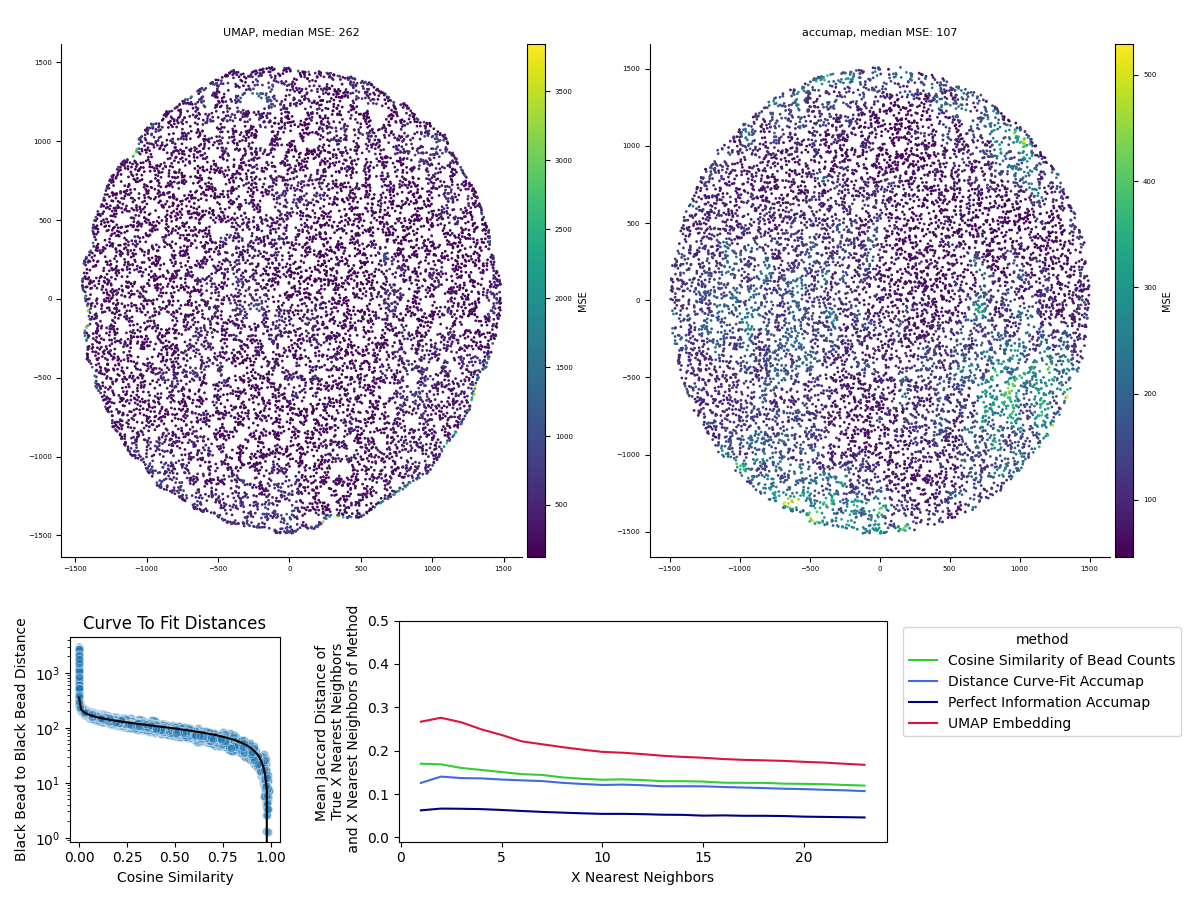

In [8]:
big_img = get_concat_v_multi_resize([
    Image.open('Fig1a.png'), 
    get_concat_h_multi_resize([Image.open('Fig1b.png'), Image.open('Fig1c.png')])
                                    ])
big_img.save('Fig1.png')
big_img

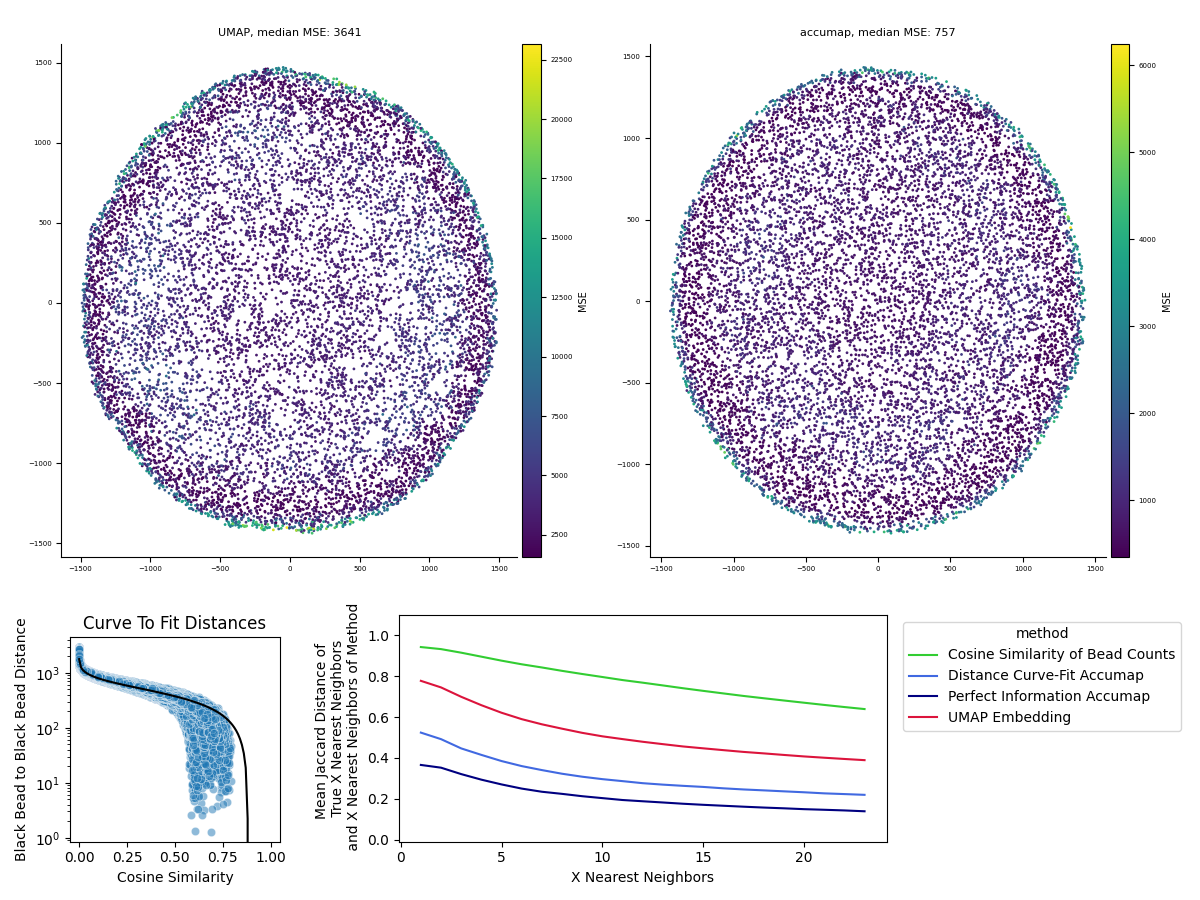

In [9]:
big_img = get_concat_v_multi_resize([
    Image.open('Supp1a.png'), 
    get_concat_h_multi_resize([Image.open('Supp1b.png'), Image.open('Supp1c.png')])
                                    ])
big_img.save('Supp1.png')
big_img

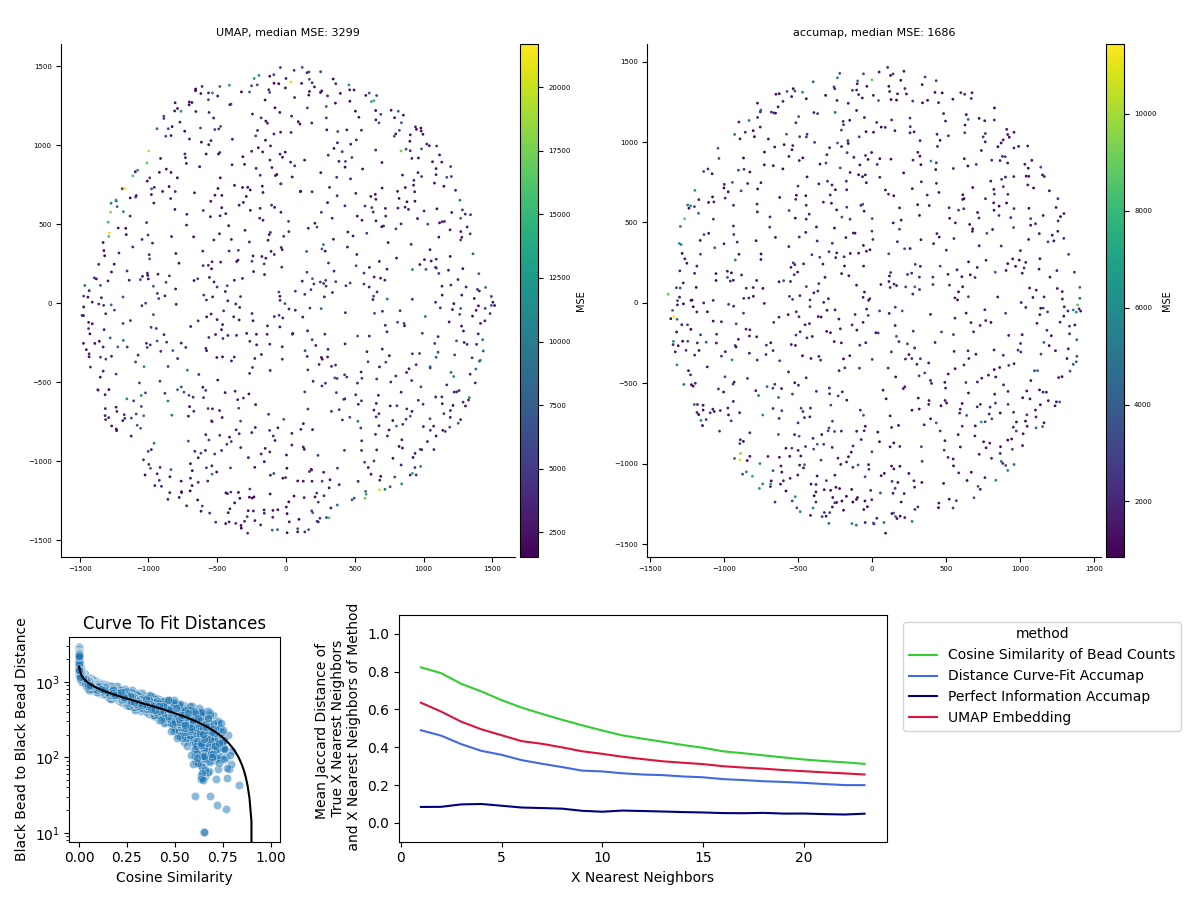

In [10]:
big_img = get_concat_v_multi_resize([
    Image.open('Supp2a.png'), 
    get_concat_h_multi_resize([Image.open('Supp2b.png'), Image.open('Supp2c.png')])
                                    ])
big_img.save('Supp2.png')
big_img